In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
wh = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weight-height.csv')
wh.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
print('Our Data has {} samples.'.format(wh.shape[0]))

Our Data has 10000 samples.


<ipython-input-8-930b8005c96e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(wh['Height'], rug = True)


<Axes: xlabel='Height', ylabel='Density'>

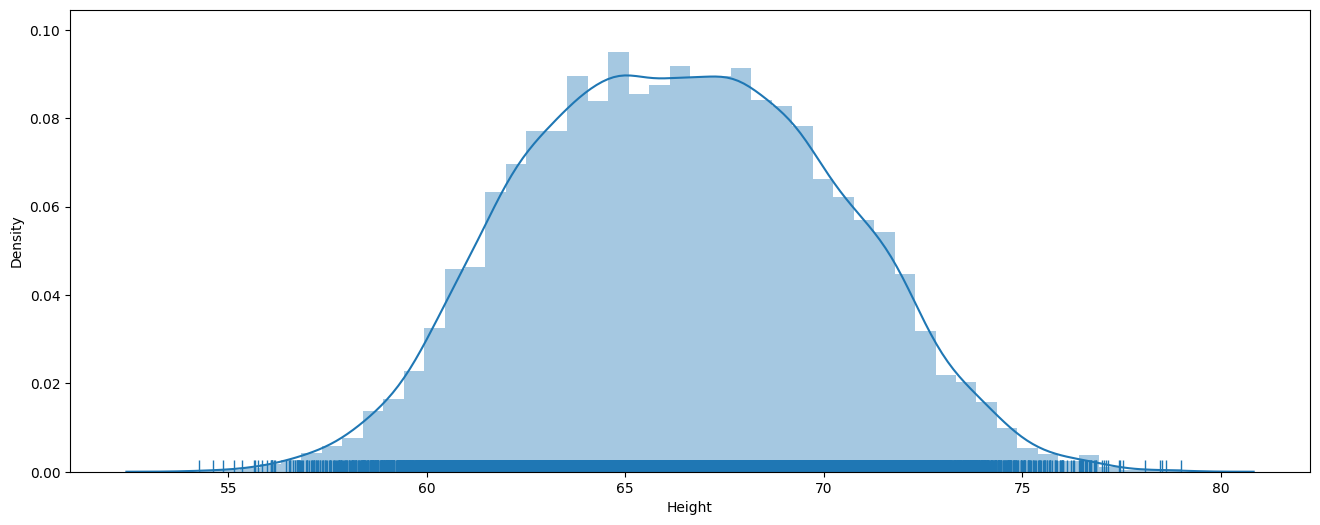

In [ ]:
# Let's see the distribution of height
plt.figure(figsize=(16, 6))
sb.distplot(wh['Height'], rug = True)


<ipython-input-9-ca9d57200bdd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(wh['Weight'], rug = True)


<Axes: xlabel='Weight', ylabel='Density'>

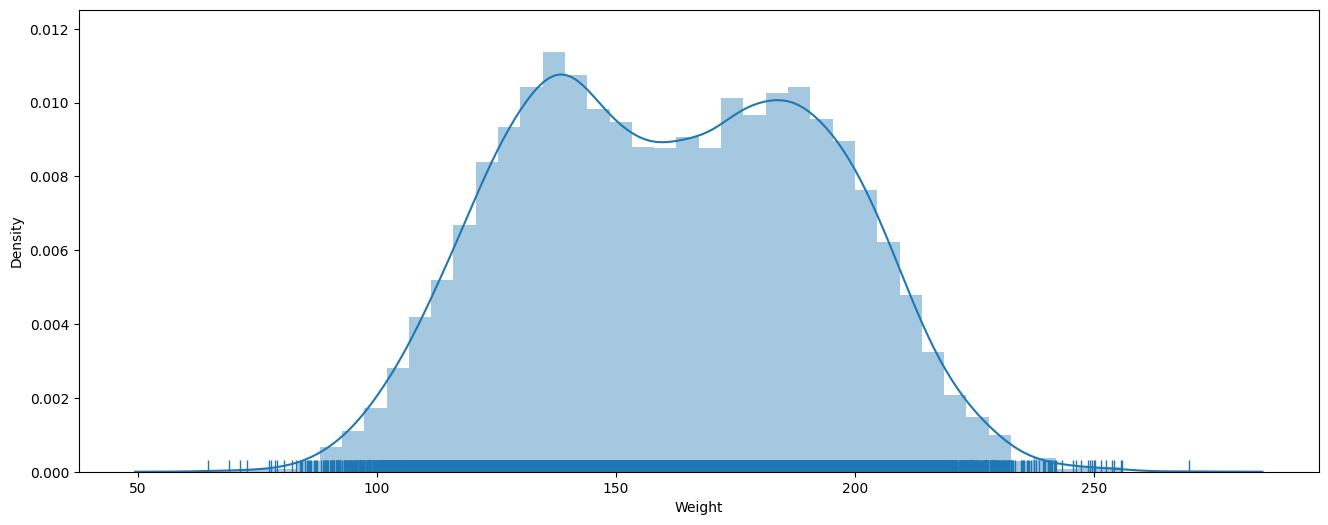

In [ ]:
# Let's see the distribution of weight
plt.figure(figsize=(16, 6))
sb.distplot(wh['Weight'], rug = True)


<Figure size 1600x600 with 0 Axes>

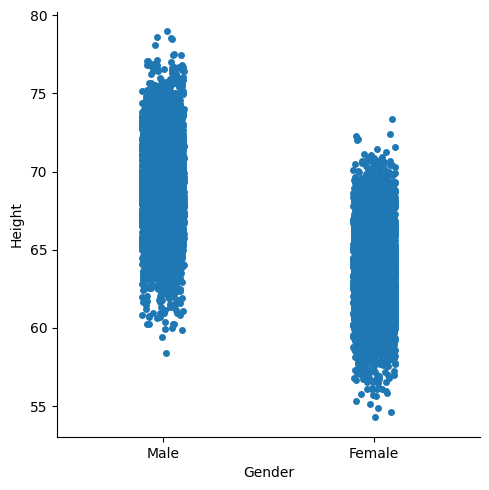

In [ ]:
# Let's see the distribution of gender
plt.figure(figsize=(16, 6))
sb.catplot(x = 'Gender', y = 'Height', data = wh)


<Figure size 1600x600 with 0 Axes>

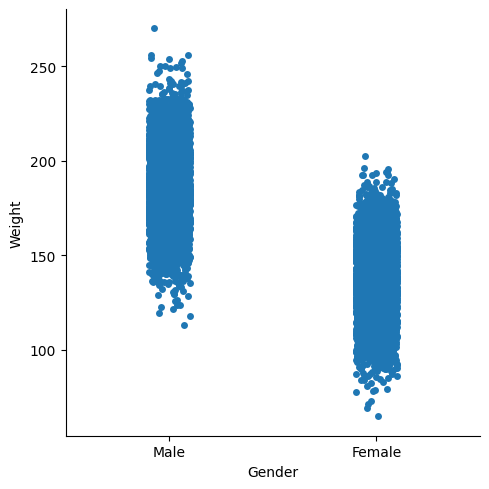

In [ ]:
# Let's see the distribution of gender
plt.figure(figsize=(16, 6))
sb.catplot(x = 'Gender', y = 'Weight', data = wh)


<Axes: >

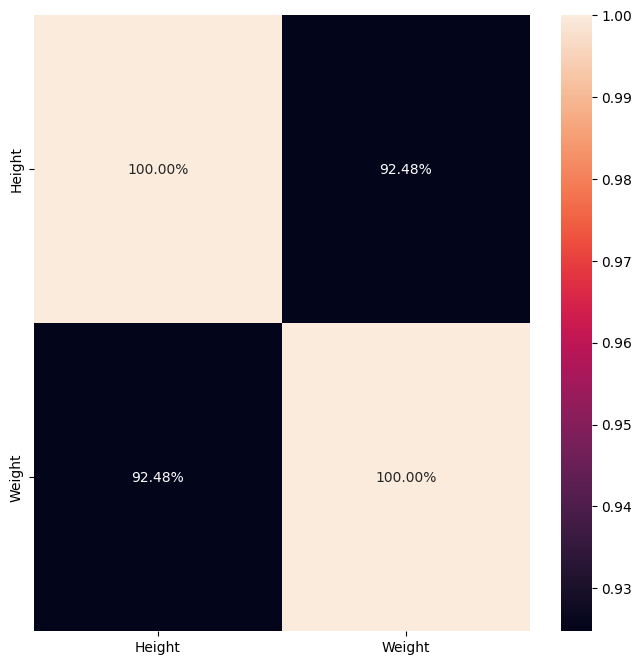

In [ ]:
plt.figure(figsize=(8, 8))
sb.heatmap(wh[['Height', 'Weight']].corr(), annot=True, fmt='.2%')


<Figure size 1000x800 with 0 Axes>

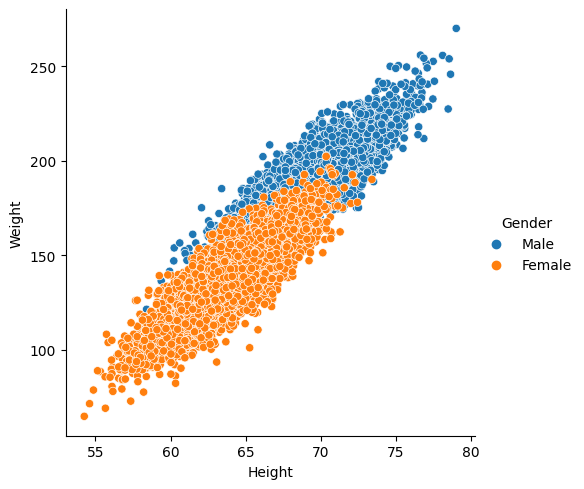

In [ ]:
# Let's visualize the dataset
plt.figure(figsize = (10, 8))
sb.relplot(x = 'Height', y = 'Weight', data = wh, hue = 'Gender')


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = wh.iloc[:, [1, 2]].values
y = wh.iloc[:, 0].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability = True))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True))])

In [ ]:
print("Training Score : ", clf.score(X_train, y_train) * 100)
print("Training Score : ", clf.score(X_test, y_test) * 100)

Training Score :  91.47142857142858
Training Score :  91.9


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

      Female       0.92      0.91      0.92      1463
        Male       0.92      0.92      0.92      1537

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



In [ ]:
clf.predict_proba([[64, 152]])

array([[0.80252077, 0.19747923]])